In [0]:
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()


In [0]:
from sklearn.model_selection import train_test_split
train_size = 0.916667
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, train_size=train_size)

###Size of test, train and valid

In [0]:
print("train = " , len(x_train))
print("valid = " , len(x_valid))
print("test = " , len(x_test))

train =  55000
valid =  5000
test =  10000


###Converting the labels into one hot encoding

In [0]:
from keras.utils import to_categorical
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)
y_valid_one_hot = to_categorical(y_valid)

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Flatten

###Building of the model

In [0]:
model = Sequential()
model.add(Flatten(input_shape = (28,28)))
model.add(Dense(32, activation = 'sigmoid' ))
model.add(Dense(10, activation = 'softmax'))

In [0]:
from keras import optimizers

sgd = optimizers.SGD(lr=0.1)


Using TensorFlow backend.


In [0]:
model.compile(optimizer=sgd,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [0]:
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_8 (Dense)              (None, 10)                330       
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________
None


### Training the model for 10 epochs

In [0]:

history = model.fit(x=x_train,y=y_train_one_hot, batch_size=None, 
          epochs=10, verbose=1, callbacks=None,
          validation_data=(x_valid,y_valid_one_hot),
          shuffle=True, class_weight=None, sample_weight=None, 
          initial_epoch=0,validation_freq=1)

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 7s 131us/step - loss: 1.5061 - acc: 0.5070 - val_loss: 1.2900 - val_acc: 0.5188
Epoch 2/10
55000/55000 [==============================] - 7s 125us/step - loss: 1.1163 - acc: 0.6227 - val_loss: 1.0607 - val_acc: 0.6370
Epoch 3/10
55000/55000 [==============================] - 7s 125us/step - loss: 1.0094 - acc: 0.6497 - val_loss: 1.0220 - val_acc: 0.6490
Epoch 4/10
55000/55000 [==============================] - 7s 130us/step - loss: 1.0063 - acc: 0.6519 - val_loss: 0.9465 - val_acc: 0.6532
Epoch 5/10
55000/55000 [==============================] - 7s 130us/step - loss: 1.0181 - acc: 0.6380 - val_loss: 1.2478 - val_acc: 0.5424
Epoch 6/10
55000/55000 [==============================] - 7s 125us/step - loss: 1.1620 - acc: 0.5890 - val_loss: 1.2598 - val_acc: 0.5594
Epoch 7/10
55000/55000 [==============================] - 7s 120us/step - loss: 1.1472 - acc: 0.6013 - val_loss: 1.1434 - v

In [0]:
[test_loss, test_acc] = model.evaluate(x_test, y_test_one_hot)
print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))

10000/10000 [==============================] - 1s 55us/step
Evaluation result on Test Data : Loss = 0.9114438172340393, accuracy = 0.7081


Text(0.5, 1.0, 'Accuracy Curves')

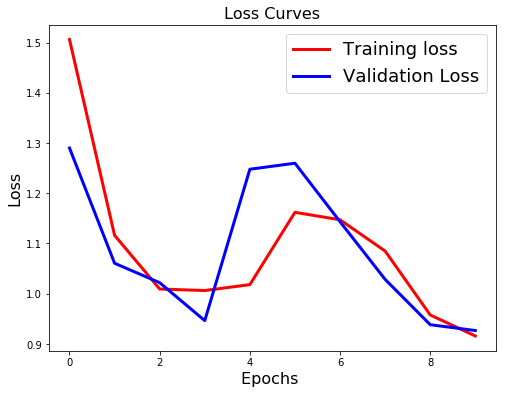

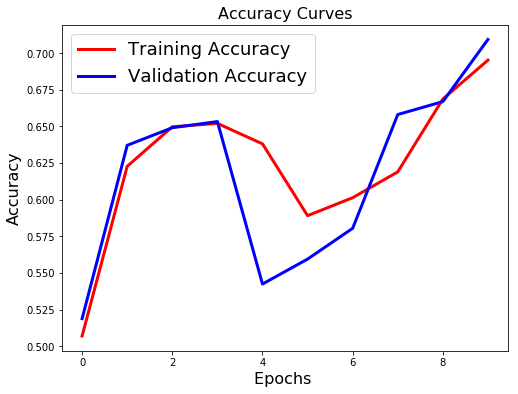

In [0]:
import matplotlib.pyplot as plt
#Plot the Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)
 
#Plot the Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['acc'],'r',linewidth=3.0)
plt.plot(history.history['val_acc'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

###Normalization of dataset

In [0]:
x_train = x_train.astype('float32')
x_valid = x_valid.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255.0
x_valid /= 255.0
x_test /= 255.0

In [0]:
from keras.utils import to_categorical
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)
y_valid_one_hot = to_categorical(y_valid)

In [0]:
model2 = Sequential()
model2.add(Flatten(input_shape = (28,28)))
model2.add(Dense(32, activation = 'sigmoid' ))
model2.add(Dense(10, activation = 'softmax'))

In [0]:
from keras import optimizers

sgd = optimizers.SGD(lr=0.1)


In [0]:
model2.compile(optimizer=sgd,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [0]:
print(model2.summary())

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_5 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 32)                25120     
_________________________________________________________________
dense_12 (Dense)             (None, 10)                330       
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________
None


In [0]:

history = model2.fit(x=x_train,y=y_train_one_hot, batch_size=None, 
          epochs=10, verbose=1, callbacks=None,
          validation_data=(x_valid,y_valid_one_hot),
          shuffle=True, class_weight=None, sample_weight=None, 
          initial_epoch=0,validation_freq=1)

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 7s 129us/step - loss: 0.6373 - acc: 0.8457 - val_loss: 0.3476 - val_acc: 0.9082
Epoch 2/10
55000/55000 [==============================] - 7s 125us/step - loss: 0.3102 - acc: 0.9123 - val_loss: 0.2791 - val_acc: 0.9240
Epoch 3/10
55000/55000 [==============================] - 7s 124us/step - loss: 0.2615 - acc: 0.9251 - val_loss: 0.2480 - val_acc: 0.9328
Epoch 4/10
55000/55000 [==============================] - 7s 124us/step - loss: 0.2320 - acc: 0.9329 - val_loss: 0.2285 - val_acc: 0.9346
Epoch 5/10
55000/55000 [==============================] - 7s 126us/step - loss: 0.2107 - acc: 0.9398 - val_loss: 0.2112 - val_acc: 0.9428
Epoch 6/10
55000/55000 [==============================] - 7s 123us/step - loss: 0.1941 - acc: 0.9442 - val_loss: 0.1957 - val_acc: 0.9466
Epoch 7/10
55000/55000 [==============================] - 7s 124us/step - loss: 0.1808 - acc: 0.9483 - val_loss: 0.1884 - v

In [0]:
[test_loss, test_acc] = model2.evaluate(x_test, y_test_one_hot)
print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))

10000/10000 [==============================] - 1s 59us/step
Evaluation result on Test Data : Loss = 0.15828541305959223, accuracy = 0.955


Text(0.5, 1.0, 'Accuracy Curves')

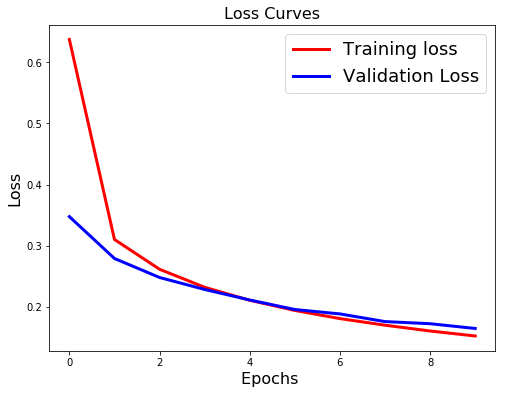

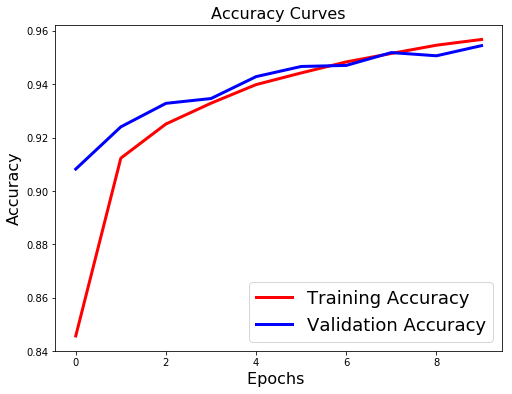

In [0]:
import matplotlib.pyplot as plt
#Plot the Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)
 
#Plot the Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['acc'],'r',linewidth=3.0)
plt.plot(history.history['val_acc'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

###Conclusion : Normalized Data has performed better

###Now number of hidden layer = 2

In [0]:
model3 = Sequential()
model3.add(Flatten(input_shape = (28,28)))
model3.add(Dense(32, activation = 'sigmoid' ))
model3.add(Dense(32, activation = 'sigmoid' ))
model3.add(Dense(10, activation = 'softmax'))

In [0]:
model3.compile(optimizer=sgd,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [0]:
print(model3.summary())

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_6 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 32)                25120     
_________________________________________________________________
dense_14 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_15 (Dense)             (None, 10)                330       
Total params: 26,506
Trainable params: 26,506
Non-trainable params: 0
_________________________________________________________________
None


In [0]:

history = model3.fit(x=x_train,y=y_train_one_hot, batch_size=None, 
          epochs=10, verbose=1, callbacks=None,
          validation_data=(x_valid,y_valid_one_hot),
          shuffle=True, class_weight=None, sample_weight=None, 
          initial_epoch=0,validation_freq=1)

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 8s 138us/step - loss: 1.1016 - acc: 0.6882 - val_loss: 0.4755 - val_acc: 0.8688
Epoch 2/10
55000/55000 [==============================] - 7s 134us/step - loss: 0.3813 - acc: 0.8943 - val_loss: 0.3174 - val_acc: 0.9086
Epoch 3/10
55000/55000 [==============================] - 7s 132us/step - loss: 0.2875 - acc: 0.9181 - val_loss: 0.2623 - val_acc: 0.9266
Epoch 4/10
55000/55000 [==============================] - 7s 134us/step - loss: 0.2420 - acc: 0.9294 - val_loss: 0.2275 - val_acc: 0.9394
Epoch 5/10
55000/55000 [==============================] - 7s 132us/step - loss: 0.2116 - acc: 0.9389 - val_loss: 0.2026 - val_acc: 0.9440
Epoch 6/10
55000/55000 [==============================] - 7s 132us/step - loss: 0.1892 - acc: 0.9453 - val_loss: 0.1863 - val_acc: 0.9494
Epoch 7/10
55000/55000 [==============================] - 7s 129us/step - loss: 0.1708 - acc: 0.9504 - val_loss: 0.1756 - v

In [0]:
[test_loss, test_acc] = model3.evaluate(x_test, y_test_one_hot)
print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))

10000/10000 [==============================] - 1s 61us/step
Evaluation result on Test Data : Loss = 0.14405388410016895, accuracy = 0.9582


Text(0.5, 1.0, 'Accuracy Curves')

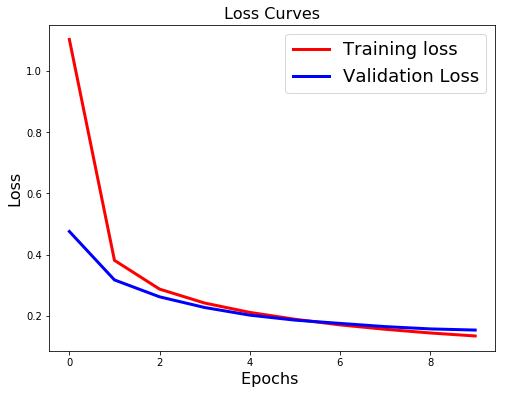

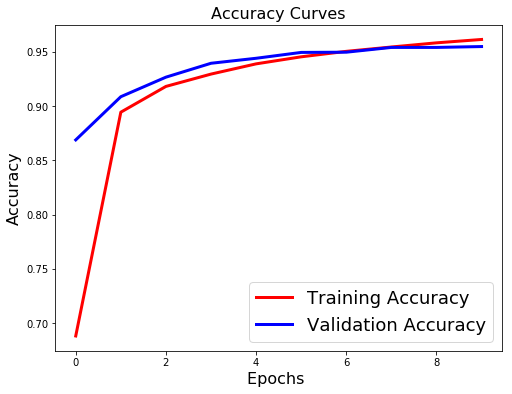

In [0]:
import matplotlib.pyplot as plt
#Plot the Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)
 
#Plot the Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['acc'],'r',linewidth=3.0)
plt.plot(history.history['val_acc'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

###Now number of hidden layer = 3

In [0]:
model4 = Sequential()
model4.add(Flatten(input_shape = (28,28)))
model4.add(Dense(32, activation = 'sigmoid' ))
model4.add(Dense(32, activation = 'sigmoid' ))
model4.add(Dense(32, activation = 'sigmoid' ))
model4.add(Dense(10, activation = 'softmax'))

In [0]:
model4.compile(optimizer=sgd,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [0]:
print(model4.summary())

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_7 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 32)                25120     
_________________________________________________________________
dense_17 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_18 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_19 (Dense)             (None, 10)                330       
Total params: 27,562
Trainable params: 27,562
Non-trainable params: 0
_________________________________________________________________
None


In [0]:

history = model4.fit(x=x_train,y=y_train_one_hot, batch_size=None, 
          epochs=10, verbose=1, callbacks=None,
          validation_data=(x_valid,y_valid_one_hot),
          shuffle=True, class_weight=None, sample_weight=None, 
          initial_epoch=0,validation_freq=1)

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 8s 144us/step - loss: 1.9891 - acc: 0.2843 - val_loss: 1.2944 - val_acc: 0.5906
Epoch 2/10
55000/55000 [==============================] - 8s 137us/step - loss: 0.7963 - acc: 0.7672 - val_loss: 0.5122 - val_acc: 0.8664
Epoch 3/10
55000/55000 [==============================] - 8s 141us/step - loss: 0.4219 - acc: 0.8869 - val_loss: 0.3629 - val_acc: 0.9010
Epoch 4/10
55000/55000 [==============================] - 8s 143us/step - loss: 0.3179 - acc: 0.9142 - val_loss: 0.2880 - val_acc: 0.9194
Epoch 5/10
55000/55000 [==============================] - 8s 142us/step - loss: 0.2547 - acc: 0.9293 - val_loss: 0.2380 - val_acc: 0.9332
Epoch 6/10
55000/55000 [==============================] - 8s 140us/step - loss: 0.2126 - acc: 0.9404 - val_loss: 0.2360 - val_acc: 0.9316
Epoch 7/10
55000/55000 [==============================] - 8s 141us/step - loss: 0.1860 - acc: 0.9476 - val_loss: 0.1830 - v

In [0]:
[test_loss, test_acc] = model4.evaluate(x_test, y_test_one_hot)
print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))

10000/10000 [==============================] - 1s 63us/step
Evaluation result on Test Data : Loss = 0.19250026015490293, accuracy = 0.9454


Text(0.5, 1.0, 'Accuracy Curves')

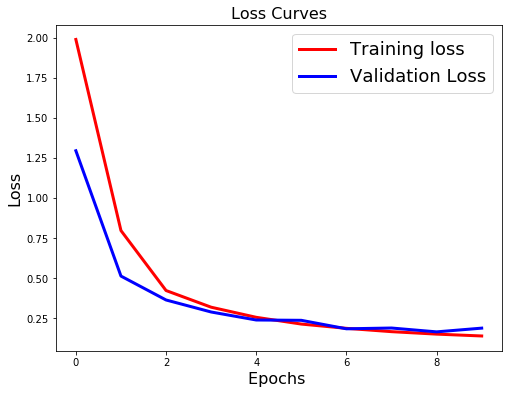

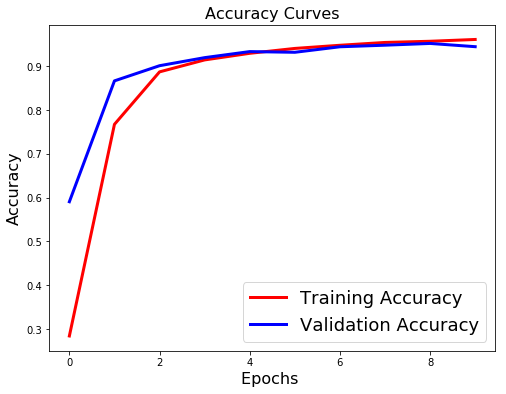

In [0]:
import matplotlib.pyplot as plt
#Plot the Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)
 
#Plot the Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['acc'],'r',linewidth=3.0)
plt.plot(history.history['val_acc'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

### The test and validation accuracy of the model3(hidden layers = 2) is greater than model4(hidden layer = 3), hence moving further with model3

###changing the learning rate = 0.001

In [0]:
from keras import optimizers

sgd = optimizers.SGD(lr=0.001)


In [0]:
model5 = Sequential()
model5.add(Flatten(input_shape = (28,28)))
model5.add(Dense(32, activation = 'sigmoid' ))
model5.add(Dense(32, activation = 'sigmoid' ))
model5.add(Dense(10, activation = 'softmax'))

In [0]:
model5.compile(optimizer=sgd,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [0]:
print(model5.summary())

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_8 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_20 (Dense)             (None, 32)                25120     
_________________________________________________________________
dense_21 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_22 (Dense)             (None, 10)                330       
Total params: 26,506
Trainable params: 26,506
Non-trainable params: 0
_________________________________________________________________
None


In [0]:

history = model5.fit(x=x_train,y=y_train_one_hot, batch_size=None, 
          epochs=10, verbose=1, callbacks=None,
          validation_data=(x_valid,y_valid_one_hot),
          shuffle=True, class_weight=None, sample_weight=None, 
          initial_epoch=0,validation_freq=1)

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 8s 144us/step - loss: 2.3304 - acc: 0.0887 - val_loss: 2.2975 - val_acc: 0.1064
Epoch 2/10
55000/55000 [==============================] - 7s 135us/step - loss: 2.2900 - acc: 0.1543 - val_loss: 2.2834 - val_acc: 0.1734
Epoch 3/10
55000/55000 [==============================] - 7s 135us/step - loss: 2.2773 - acc: 0.1838 - val_loss: 2.2721 - val_acc: 0.1954
Epoch 4/10
55000/55000 [==============================] - 7s 135us/step - loss: 2.2655 - acc: 0.2106 - val_loss: 2.2601 - val_acc: 0.2274
Epoch 5/10
55000/55000 [==============================] - 7s 136us/step - loss: 2.2531 - acc: 0.2498 - val_loss: 2.2474 - val_acc: 0.2504
Epoch 6/10
55000/55000 [==============================] - 7s 135us/step - loss: 2.2398 - acc: 0.2788 - val_loss: 2.2337 - val_acc: 0.2788
Epoch 7/10
55000/55000 [==============================] - 7s 134us/step - loss: 2.2253 - acc: 0.3101 - val_loss: 2.2186 - v

In [0]:
[test_loss, test_acc] = model5.evaluate(x_test, y_test_one_hot)
print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))

10000/10000 [==============================] - 1s 59us/step
Evaluation result on Test Data : Loss = 2.157281999206543, accuracy = 0.413


Text(0.5, 1.0, 'Accuracy Curves')

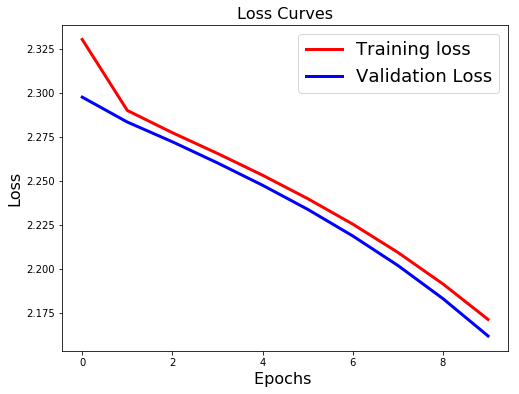

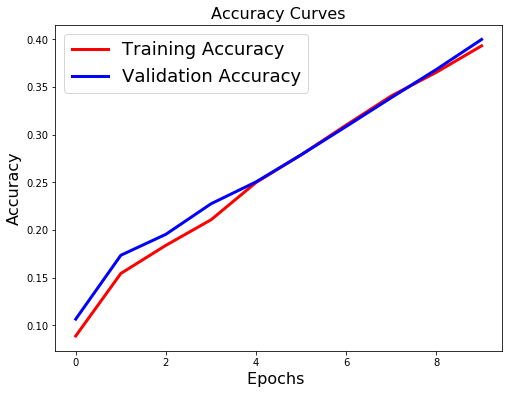

In [0]:
import matplotlib.pyplot as plt
#Plot the Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)
 
#Plot the Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['acc'],'r',linewidth=3.0)
plt.plot(history.history['val_acc'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

###changing the learning rate = 0.0001

In [0]:
from keras import optimizers

sgd = optimizers.SGD(lr=0.0001)


In [0]:
model6 = Sequential()
model6.add(Flatten(input_shape = (28,28)))
model6.add(Dense(32, activation = 'sigmoid' ))
model6.add(Dense(32, activation = 'sigmoid' ))
model6.add(Dense(10, activation = 'softmax'))

In [0]:
model6.compile(optimizer=sgd,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [0]:
print(model6.summary())

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_9 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_23 (Dense)             (None, 32)                25120     
_________________________________________________________________
dense_24 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_25 (Dense)             (None, 10)                330       
Total params: 26,506
Trainable params: 26,506
Non-trainable params: 0
_________________________________________________________________
None


In [0]:

history = model6.fit(x=x_train,y=y_train_one_hot, batch_size=None, 
          epochs=10, verbose=1, callbacks=None,
          validation_data=(x_valid,y_valid_one_hot),
          shuffle=True, class_weight=None, sample_weight=None, 
          initial_epoch=0,validation_freq=1)

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 8s 144us/step - loss: 2.5373 - acc: 0.0989 - val_loss: 2.4884 - val_acc: 0.1022
Epoch 2/10
55000/55000 [==============================] - 7s 135us/step - loss: 2.4608 - acc: 0.0989 - val_loss: 2.4293 - val_acc: 0.1022
Epoch 3/10
55000/55000 [==============================] - 7s 134us/step - loss: 2.4114 - acc: 0.0989 - val_loss: 2.3899 - val_acc: 0.1022
Epoch 4/10
55000/55000 [==============================] - 7s 136us/step - loss: 2.3778 - acc: 0.0989 - val_loss: 2.3624 - val_acc: 0.1022
Epoch 5/10
55000/55000 [==============================] - 7s 133us/step - loss: 2.3540 - acc: 0.0989 - val_loss: 2.3428 - val_acc: 0.1022
Epoch 6/10
55000/55000 [==============================] - 7s 135us/step - loss: 2.3367 - acc: 0.0989 - val_loss: 2.3284 - val_acc: 0.1022
Epoch 7/10
55000/55000 [==============================] - 8s 137us/step - loss: 2.3240 - acc: 0.0989 - val_loss: 2.3178 - v

In [0]:
[test_loss, test_acc] = model6.evaluate(x_test, y_test_one_hot)
print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))

10000/10000 [==============================] - 1s 60us/step
Evaluation result on Test Data : Loss = 2.2968423244476317, accuracy = 0.1566


Text(0.5, 1.0, 'Accuracy Curves')

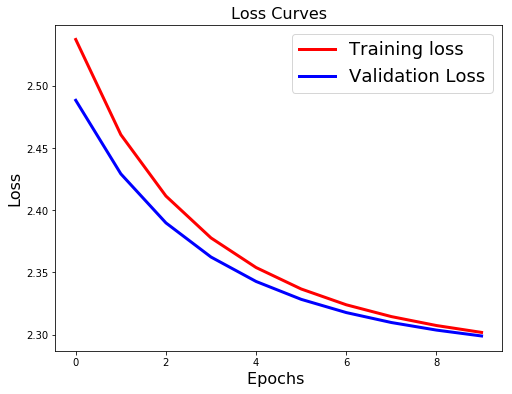

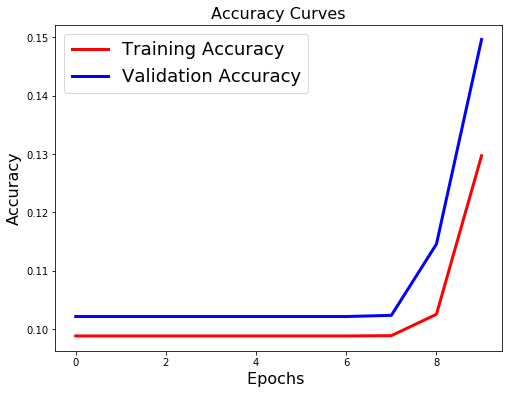

In [0]:
import matplotlib.pyplot as plt
#Plot the Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)
 
#Plot the Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['acc'],'r',linewidth=3.0)
plt.plot(history.history['val_acc'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

### The model having learning rate of 0.1 has performed best because in other two cases the learning process is very slow. Moving further the model with LR = 0.1

###changing the number of nodes in hidden layer = 64



In [0]:
from keras import optimizers

sgd = optimizers.SGD(lr=0.1)


In [0]:
model7 = Sequential()
model7.add(Flatten(input_shape = (28,28)))
model7.add(Dense(64, activation = 'sigmoid' ))
model7.add(Dense(64, activation = 'sigmoid' ))
model7.add(Dense(10, activation = 'softmax'))

In [0]:
model7.compile(optimizer=sgd,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [0]:
print(model7.summary())

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_11 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_29 (Dense)             (None, 64)                50240     
_________________________________________________________________
dense_30 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_31 (Dense)             (None, 10)                650       
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________
None


In [0]:

history = model7.fit(x=x_train,y=y_train_one_hot, batch_size=None, 
          epochs=10, verbose=1, callbacks=None,
          validation_data=(x_valid,y_valid_one_hot),
          shuffle=True, class_weight=None, sample_weight=None, 
          initial_epoch=0,validation_freq=1)

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 8s 143us/step - loss: 1.0042 - acc: 0.7089 - val_loss: 0.4080 - val_acc: 0.8912
Epoch 2/10
55000/55000 [==============================] - 7s 133us/step - loss: 0.3472 - acc: 0.9025 - val_loss: 0.2980 - val_acc: 0.9168
Epoch 3/10
55000/55000 [==============================] - 7s 132us/step - loss: 0.2769 - acc: 0.9194 - val_loss: 0.2574 - val_acc: 0.9266
Epoch 4/10
55000/55000 [==============================] - 7s 135us/step - loss: 0.2357 - acc: 0.9311 - val_loss: 0.2354 - val_acc: 0.9296
Epoch 5/10
55000/55000 [==============================] - 7s 133us/step - loss: 0.2044 - acc: 0.9405 - val_loss: 0.2019 - val_acc: 0.9432
Epoch 6/10
55000/55000 [==============================] - 7s 134us/step - loss: 0.1801 - acc: 0.9478 - val_loss: 0.1809 - val_acc: 0.9488
Epoch 7/10
55000/55000 [==============================] - 7s 134us/step - loss: 0.1602 - acc: 0.9534 - val_loss: 0.1640 - v

In [0]:
[test_loss, test_acc] = model7.evaluate(x_test, y_test_one_hot)
print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))

10000/10000 [==============================] - 1s 59us/step
Evaluation result on Test Data : Loss = 0.13163422077074646, accuracy = 0.9608


Text(0.5, 1.0, 'Accuracy Curves')

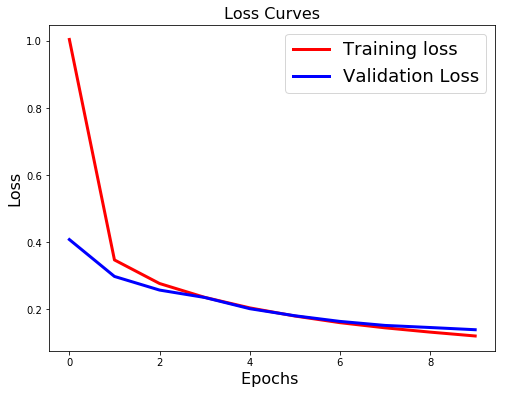

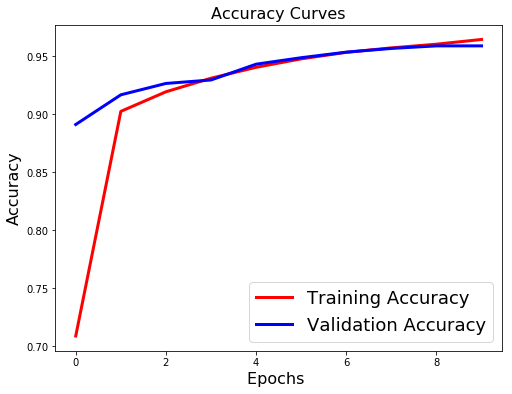

In [0]:
import matplotlib.pyplot as plt
#Plot the Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)
 
#Plot the Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['acc'],'r',linewidth=3.0)
plt.plot(history.history['val_acc'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

###changing the number of nodes in hidden layer = 128


In [0]:
model8 = Sequential()
model8.add(Flatten(input_shape = (28,28)))
model8.add(Dense(128, activation = 'sigmoid' ))
model8.add(Dense(128, activation = 'sigmoid' ))
model8.add(Dense(10, activation = 'softmax'))

In [0]:
model8.compile(optimizer=sgd,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [0]:
print(model8.summary())

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_12 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_32 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_33 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_34 (Dense)             (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________
None


In [0]:

history = model8.fit(x=x_train,y=y_train_one_hot, batch_size=None, 
          epochs=10, verbose=1, callbacks=None,
          validation_data=(x_valid,y_valid_one_hot),
          shuffle=True, class_weight=None, sample_weight=None, 
          initial_epoch=0,validation_freq=1)

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 8s 146us/step - loss: 0.9045 - acc: 0.7323 - val_loss: 0.3934 - val_acc: 0.8890
Epoch 2/10
55000/55000 [==============================] - 8s 140us/step - loss: 0.3429 - acc: 0.9010 - val_loss: 0.3023 - val_acc: 0.9150
Epoch 3/10
55000/55000 [==============================] - 8s 138us/step - loss: 0.2832 - acc: 0.9169 - val_loss: 0.2604 - val_acc: 0.9254
Epoch 4/10
55000/55000 [==============================] - 8s 139us/step - loss: 0.2447 - acc: 0.9286 - val_loss: 0.2420 - val_acc: 0.9298
Epoch 5/10
55000/55000 [==============================] - 8s 142us/step - loss: 0.2159 - acc: 0.9361 - val_loss: 0.2114 - val_acc: 0.9408
Epoch 6/10
55000/55000 [==============================] - 8s 137us/step - loss: 0.1924 - acc: 0.9435 - val_loss: 0.1931 - val_acc: 0.9462
Epoch 7/10
55000/55000 [==============================] - 8s 138us/step - loss: 0.1730 - acc: 0.9483 - val_loss: 0.1796 - v

In [0]:
[test_loss, test_acc] = model8.evaluate(x_test, y_test_one_hot)
print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))

10000/10000 [==============================] - 1s 60us/step
Evaluation result on Test Data : Loss = 0.13372037934735417, accuracy = 0.9589


Text(0.5, 1.0, 'Accuracy Curves')

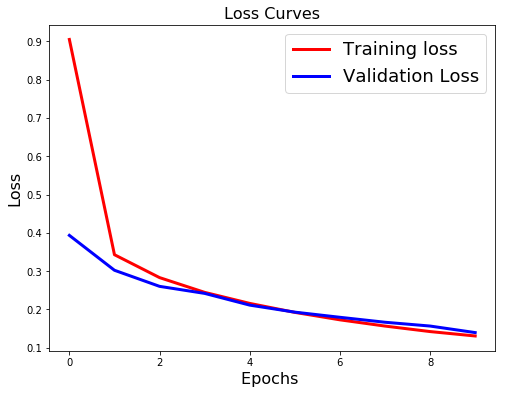

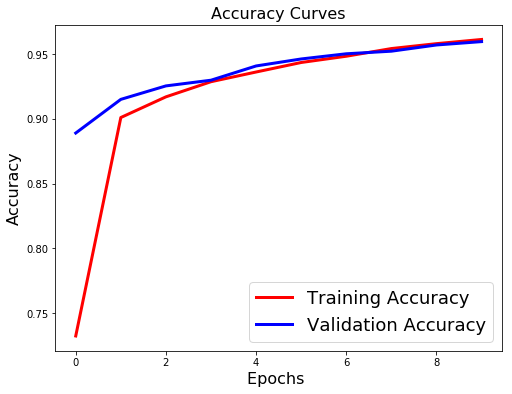

In [0]:
import matplotlib.pyplot as plt
#Plot the Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)
 
#Plot the Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['acc'],'r',linewidth=3.0)
plt.plot(history.history['val_acc'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

### Statistics :-
### Hidden node = 64 , Validation acc = 0.9590 , Test acc = 0.9608
### Hidden node = 128 , Validation acc = 0.9596 , Test acc = 0.9589

###I would like to move further with Hidden node = 64 because it's test accuracy is greater than other model and the validation accuracy is nearly equal.
###Now giving the activation function as *tanh* in hidden layer

In [0]:
model9 = Sequential()
model9.add(Flatten(input_shape = (28,28)))
model9.add(Dense(64, activation = 'tanh' ))
model9.add(Dense(64, activation = 'tanh' ))
model9.add(Dense(10, activation = 'softmax'))

In [0]:
model9.compile(optimizer=sgd,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [0]:
print(model9.summary())

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_14 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_38 (Dense)             (None, 64)                50240     
_________________________________________________________________
dense_39 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_40 (Dense)             (None, 10)                650       
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________
None


In [0]:

history = model9.fit(x=x_train,y=y_train_one_hot, batch_size=None, 
          epochs=10, verbose=1, callbacks=None,
          validation_data=(x_valid,y_valid_one_hot),
          shuffle=True, class_weight=None, sample_weight=None, 
          initial_epoch=0,validation_freq=1)

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 8s 146us/step - loss: 0.3155 - acc: 0.9087 - val_loss: 0.1963 - val_acc: 0.9446
Epoch 2/10
55000/55000 [==============================] - 7s 135us/step - loss: 0.1575 - acc: 0.9521 - val_loss: 0.1419 - val_acc: 0.9574
Epoch 3/10
55000/55000 [==============================] - 7s 130us/step - loss: 0.1125 - acc: 0.9655 - val_loss: 0.1068 - val_acc: 0.9698
Epoch 4/10
55000/55000 [==============================] - 7s 134us/step - loss: 0.0877 - acc: 0.9731 - val_loss: 0.0973 - val_acc: 0.9704
Epoch 5/10
55000/55000 [==============================] - 7s 136us/step - loss: 0.0710 - acc: 0.9783 - val_loss: 0.1039 - val_acc: 0.9662
Epoch 6/10
55000/55000 [==============================] - 7s 133us/step - loss: 0.0592 - acc: 0.9822 - val_loss: 0.0924 - val_acc: 0.9722
Epoch 7/10
55000/55000 [==============================] - 7s 135us/step - loss: 0.0500 - acc: 0.9848 - val_loss: 0.0877 - v

In [0]:
[test_loss, test_acc] = model9.evaluate(x_test, y_test_one_hot)
print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))

10000/10000 [==============================] - 1s 61us/step
Evaluation result on Test Data : Loss = 0.09508943526064977, accuracy = 0.9726


Text(0.5, 1.0, 'Accuracy Curves')

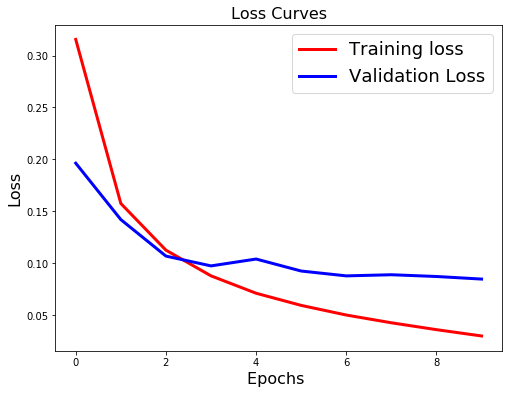

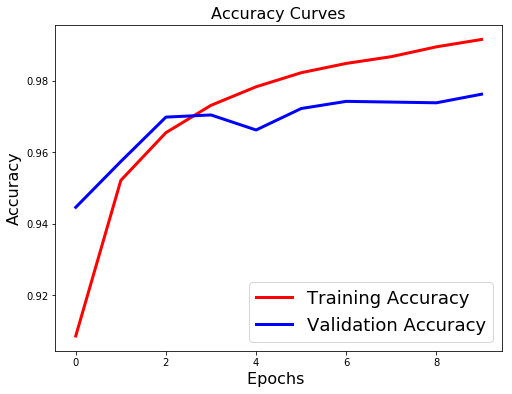

In [0]:
import matplotlib.pyplot as plt
#Plot the Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)
 
#Plot the Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['acc'],'r',linewidth=3.0)
plt.plot(history.history['val_acc'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

###Activation function is *relu*

In [0]:
model10 = Sequential()
model10.add(Flatten(input_shape = (28,28)))
model10.add(Dense(64, activation = 'relu' ))
model10.add(Dense(64, activation = 'relu' ))
model10.add(Dense(10, activation = 'softmax'))

In [0]:
model10.compile(optimizer=sgd,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [0]:
print(model10.summary())

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_14 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_38 (Dense)             (None, 64)                50240     
_________________________________________________________________
dense_39 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_40 (Dense)             (None, 10)                650       
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________
None


In [0]:

history = model10.fit(x=x_train,y=y_train_one_hot, batch_size=None, 
          epochs=10, verbose=1, callbacks=None,
          validation_data=(x_valid,y_valid_one_hot),
          shuffle=True, class_weight=None, sample_weight=None, 
          initial_epoch=0,validation_freq=1)

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 8s 149us/step - loss: 0.3034 - acc: 0.9092 - val_loss: 0.1614 - val_acc: 0.9524
Epoch 2/10
55000/55000 [==============================] - 7s 134us/step - loss: 0.1388 - acc: 0.9582 - val_loss: 0.1460 - val_acc: 0.9550
Epoch 3/10
55000/55000 [==============================] - 7s 135us/step - loss: 0.1013 - acc: 0.9689 - val_loss: 0.1103 - val_acc: 0.9670
Epoch 4/10
55000/55000 [==============================] - 7s 136us/step - loss: 0.0805 - acc: 0.9753 - val_loss: 0.1157 - val_acc: 0.9666
Epoch 5/10
55000/55000 [==============================] - 7s 135us/step - loss: 0.0666 - acc: 0.9792 - val_loss: 0.0951 - val_acc: 0.9718
Epoch 6/10
55000/55000 [==============================] - 7s 135us/step - loss: 0.0578 - acc: 0.9813 - val_loss: 0.0936 - val_acc: 0.9740
Epoch 7/10
55000/55000 [==============================] - 7s 134us/step - loss: 0.0482 - acc: 0.9847 - val_loss: 0.1246 - v

In [0]:
[test_loss, test_acc] = model10.evaluate(x_test, y_test_one_hot)
print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))

10000/10000 [==============================] - 1s 63us/step
Evaluation result on Test Data : Loss = 0.10256909943410428, accuracy = 0.9724


Text(0.5, 1.0, 'Accuracy Curves')

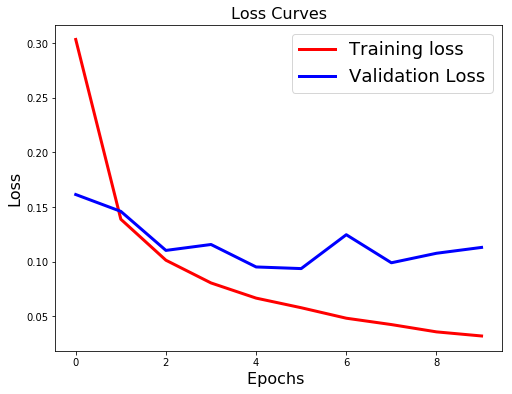

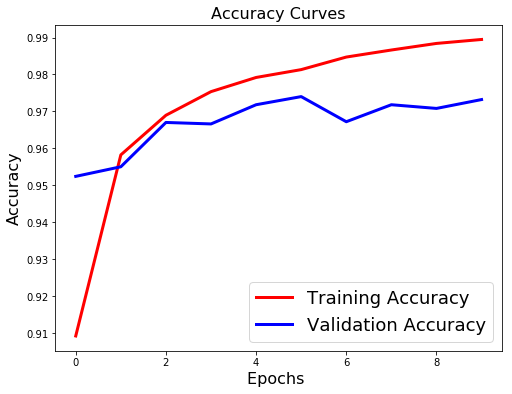

In [0]:
import matplotlib.pyplot as plt
#Plot the Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)
 
#Plot the Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['acc'],'r',linewidth=3.0)
plt.plot(history.history['val_acc'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

###Activation function is *LeakyReLU*

In [0]:
model11 = Sequential()
model11.add(Flatten(input_shape = (28,28)))
model11.add(Dense(64, activation = None ))
model11.add(LeakyReLU(alpha=0.1))
model11.add(Dense(64, activation = None ))
model11.add(LeakyReLU(alpha=0.1))
model11.add(Dense(10, activation = 'softmax'))

In [0]:
model11.compile(optimizer=sgd,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [0]:
print(model11.summary())

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_18 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_48 (Dense)             (None, 64)                50240     
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 64)                0         
_________________________________________________________________
dense_49 (Dense)             (None, 64)                4160      
_________________________________________________________________
leaky_re_lu_3 (LeakyReLU)    (None, 64)                0         
_________________________________________________________________
dense_50 (Dense)             (None, 10)                650       
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________

In [0]:

history = model11.fit(x=x_train,y=y_train_one_hot, batch_size=None, 
          epochs=10, verbose=1, callbacks=None,
          validation_data=(x_valid,y_valid_one_hot),
          shuffle=True, class_weight=None, sample_weight=None, 
          initial_epoch=0,validation_freq=1)

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 8s 142us/step - loss: 0.3175 - acc: 0.9057 - val_loss: 0.1740 - val_acc: 0.9480
Epoch 2/10
55000/55000 [==============================] - 7s 130us/step - loss: 0.1463 - acc: 0.9553 - val_loss: 0.1213 - val_acc: 0.9682
Epoch 3/10
55000/55000 [==============================] - 7s 131us/step - loss: 0.1078 - acc: 0.9668 - val_loss: 0.1147 - val_acc: 0.9650
Epoch 4/10
55000/55000 [==============================] - 7s 130us/step - loss: 0.0865 - acc: 0.9733 - val_loss: 0.1170 - val_acc: 0.9640
Epoch 5/10
55000/55000 [==============================] - 7s 130us/step - loss: 0.0724 - acc: 0.9771 - val_loss: 0.0870 - val_acc: 0.9748
Epoch 6/10
55000/55000 [==============================] - 7s 131us/step - loss: 0.0620 - acc: 0.9804 - val_loss: 0.0898 - val_acc: 0.9740
Epoch 7/10
55000/55000 [==============================] - 7s 134us/step - loss: 0.0524 - acc: 0.9839 - val_loss: 0.0994 - v

In [0]:
[test_loss, test_acc] = model11.evaluate(x_test, y_test_one_hot)
print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))

10000/10000 [==============================] - 1s 60us/step
Evaluation result on Test Data : Loss = 0.11257060655285604, accuracy = 0.9692


Text(0.5, 1.0, 'Accuracy Curves')

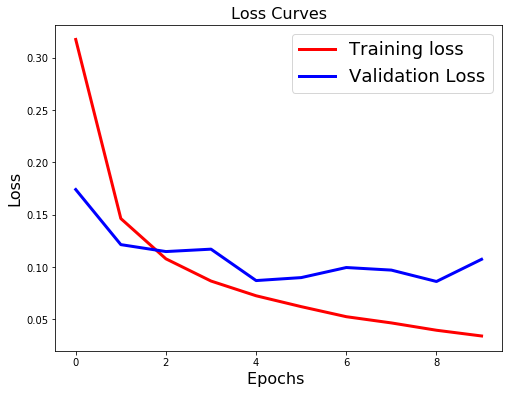

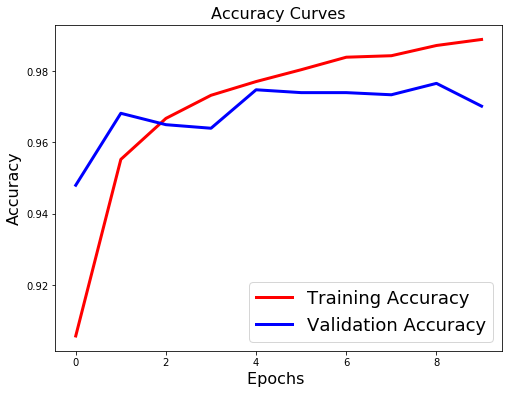

In [0]:
import matplotlib.pyplot as plt
#Plot the Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)
 
#Plot the Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['acc'],'r',linewidth=3.0)
plt.plot(history.history['val_acc'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

###Statistics :-
###Activation = sigmoid , Validation acc = 0.9590, Test acc = 0.9608
###Activation = tanh , Validation acc = 0.9762, Test acc = 0.9726
###Activation = relu , Validation acc = 0.9732 , Test acc = 0.9724
###Activation = LeakyRelu , Validation acc = 0.9702 , Test acc = 0.9692

###Above all the setting the following setting has worked best:
###Hidden layer activation = tanh
###Learning rate = 0.1
###Number of hidden unit = 2
###Number of nodes in hidden unit = 64
###The decision is based on test accuracy and validation accuracy

### Above all the models I would to choose model9 (which have the above described setting) because it has best validation and test accuracy